# Influence of Weather on the bixit system

The purpose of this notebook is to try to make correlation and draw conclusion between weather factors and bike use. We'll try to suppress other factors (such as increasing popularity of bikeshare, increasing number of bike, season's influence on people's mind, ...) as much as possible.

# Increasing popularity of the bixit system

Let's visualise the evolution of the utilisation of the bike

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import re
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
from requests import get
from bs4 import BeautifulSoup
import matplotlib.dates as mdates
import datetime

In [2]:
# loads the combined dataset
data = pd.read_pickle("../combined_data")
data.head()

,start_date,start_station_code,end_date,end_station_code,duration_sec,is_member,latitude_start,longitude_start,latitude_end,longitude_end,year,month,start_day,start_hour,end_day,end_hour,distance
0,2014-04-15 00:01:00,6209,2014-04-15 00:18:00,6436,1061,1,45.512520,-73.570620,45.486452,-73.595234,2014,4,15,0,15,0,3.475949
1,2014-04-15 00:01:00,6214,2014-04-15 00:11:00,6248,615,1,45.517350,-73.569060,45.518593,-73.581566,2014,4,15,0,15,0,0.984131
2,2014-04-15 00:01:00,6164,2014-04-15 00:18:00,6216,1031,1,45.532955,-73.584194,45.514960,-73.585030,2014,4,15,0,15,0,2.002019
3,2014-04-15 00:01:00,6214,2014-04-15 00:24:00,6082,1382,1,45.517350,-73.569060,45.550613,-73.582883,2014,4,15,0,15,0,3.852206
4,2014-04-15 00:02:00,6149,2014-04-15 00:08:00,6265,347,1,45.538670,-73.569360,45.539259,-73.577338,2014,4,15,0,15,0,0.624798


In [3]:
#to simplify, we take only the start day
df = data[['year','month','start_day']]
df.year = df.year.map(str) + '-' + df.month.map(str) + '-' + df.start_day.map(str)
df = df[['year']]

#need to convert date to datetime
df['datetime'] = df.apply(lambda row: datetime.datetime.strptime(row['year'], '%Y-%m-%d'), axis=1)

df = df[['datetime']]
df = df.rename(columns={'datetime': 'date'})

df.head()

C:\Users\Ariane Acer\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,date
0,2014-04-15
1,2014-04-15
2,2014-04-15
3,2014-04-15
4,2014-04-15


In [4]:
#Number of biketravel per day
Daily_BikeTravel = df.groupby(['date']).size().reset_index(name='count')
Daily_BikeTravel.head()

,date,count
0,2014-04-15,1577
1,2014-04-16,3180
2,2014-04-17,5852
3,2014-04-18,5325
4,2014-04-19,6031


In [5]:
# creation of the frequency column
Daily_BikeTravel.max()

date     2019-09-30 00:00:00
count                  42878
dtype: object

In [6]:
Daily_BikeTravel["frequency"] = Daily_BikeTravel["count"] / 42878
Daily_BikeTravel.head()

,date,count,frequency
0,2014-04-15,1577,0.036779
1,2014-04-16,3180,0.074164
2,2014-04-17,5852,0.136480
3,2014-04-18,5325,0.124190
4,2014-04-19,6031,0.140655


We plot the evolution of bike use in year 2018

C:\Users\Ariane Acer\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


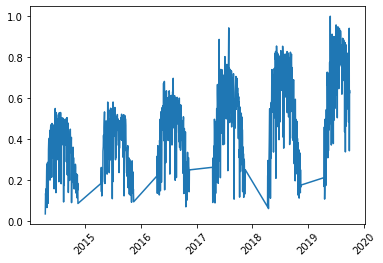

In [7]:
plt.plot(Daily_BikeTravel['date'],Daily_BikeTravel['frequency'])
plt.xticks(rotation = 45);

In [8]:
# we can do the same kind of plot but resampling to one date per month

# Number of biketravel per month
df = data[['year','month','start_day']]
df.year = df.year.map(str) + '-' + df.month.map(str)
df = df[['year']]

In [9]:
df['datetime'] = df.apply(lambda row: datetime.datetime.strptime(row['year'], '%Y-%m'), axis=1)

df = df[['datetime']]
df = df.rename(columns={'datetime': 'date'})

#cette cellule est particulièrement longue à run

Monthly_BikeTravel = df.groupby(['date']).size().reset_index(name='count')
Monthly_BikeTravel.head()

,date,count
0,2014-04-01,108264
1,2014-05-01,455261
2,2014-06-01,525863
3,2014-07-01,569352
4,2014-08-01,556780


In [10]:
Monthly_BikeTravel.max()

date     2019-09-01 00:00:00
count                1102846
dtype: object

In [13]:
Monthly_BikeTravel["frequency"] = Monthly_BikeTravel["count"] / 1102846
Monthly_BikeTravel.head()

,date,count,frequency
0,2014-04-01,108264,0.098168
1,2014-05-01,455261,0.412806
2,2014-06-01,525863,0.476824
3,2014-07-01,569352,0.516257
4,2014-08-01,556780,0.504857


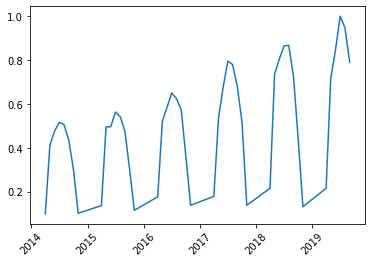

In [14]:
plt.plot(Monthly_BikeTravel['date'],Monthly_BikeTravel['frequency'])
plt.xticks(rotation = 45);

We clearly see the effect of the cycle of season.
Also as expected, bikes are more and more used.
This factor must somehow be taken into account in further analysis.

# The wheather dataset

We want to analyze the influence of weather on the use of the bikeshare system.
Each factor will be taken into account independantly from the other, then alltogether

## Influence of temperature

In [15]:
weather_2014 = pd.read_csv(r"WeatherData\2014.csv",sep = ',')
weather_2015 = pd.read_csv(r"WeatherData\2015.csv",sep = ',')
weather_2016 = pd.read_csv(r"WeatherData\2016.csv",sep = ',')
weather_2017 = pd.read_csv(r"WeatherData\2017.csv",sep = ',')
weather_2018 = pd.read_csv(r"WeatherData\2018.csv",sep = ',')
weather_2019 = pd.read_csv(r"WeatherData\2019.csv",sep = ',')

data = pd.concat([weather_2014,weather_2015,weather_2016,weather_2017,weather_2018,weather_2019])
data.head()

,Longitude (x),Latitude (y),Nom de la Station,ID climatologique,Date/Heure,Année,Mois,Jour,Qualité des Données,Temp max.(°C),...,Neige tot. (cm),Neige tot. Indicateur,Précip. tot. (mm),Précip. tot. Indicateur,Neige au sol (cm),Neige au sol Indicateur,Dir. raf. max. (10s deg),Dir. raf. max. Indicateur,Vit. raf. max. (km/h),Vit. raf. max. Indicateur
0,"-73,58","45,50",MCTAVISH,7024745,2014-01-01,2014,1,1,NaN,"-15,2",...,NaN,M,"0,0",NaN,NaN,NaN,NaN,NaN,<31,NaN
1,"-73,58","45,50",MCTAVISH,7024745,2014-01-02,2014,1,2,NaN,"-22,3",...,NaN,M,"0,0",NaN,NaN,NaN,3.0,NaN,37,NaN
2,"-73,58","45,50",MCTAVISH,7024745,2014-01-03,2014,1,3,NaN,"-19,0",...,NaN,M,"1,0",NaN,NaN,NaN,NaN,NaN,<31,NaN
3,"-73,58","45,50",MCTAVISH,7024745,2014-01-04,2014,1,4,NaN,"-6,6",...,NaN,M,"0,0",NaN,NaN,NaN,NaN,NaN,<31,NaN
4,"-73,58","45,50",MCTAVISH,7024745,2014-01-05,2014,1,5,NaN,"0,2",...,NaN,M,"8,0",NaN,NaN,NaN,NaN,NaN,<31,NaN


In [16]:
#select the useful columns
df_weather = data[['Date/Heure','Temp moy.(°C)','Précip. tot. (mm)', 'Neige au sol (cm)', 'Vit. raf. max. (km/h)']]
df_weather.rename(columns={'Date/Heure': 'Date', 'Temp moy.(°C)': 'Mean temp (°C)',
                           'Précip. tot. (mm)': 'Total precip (mm)', 'Neige au sol (cm)': 'Snow on ground (cm)',
                           'Vit. raf. max. (km/h)': 'Wind max speed (km/h)'}, inplace=True)
df_weather.head()

C:\Users\Ariane Acer\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,Date,Mean temp (°C),Total precip (mm),Snow on ground (cm),Wind max speed (km/h)
0,2014-01-01,"-19,6","0,0",NaN,<31
1,2014-01-02,"-24,9","0,0",NaN,37
2,2014-01-03,"-21,3","1,0",NaN,<31
3,2014-01-04,"-14,0","0,0",NaN,<31
4,2014-01-05,"-5,2","8,0",NaN,<31


In [17]:
#convert to datetime

df_weather['datetime'] = df_weather.apply(lambda row: datetime.datetime.strptime(row['Date'], '%Y-%m-%d'), axis=1)

df_weather = df_weather[['datetime','Mean temp (°C)','Total precip (mm)','Snow on ground (cm)','Wind max speed (km/h)']]
df_weather = df_weather.rename(columns={'datetime': 'Date'})

C:\Users\Ariane Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
df_weather.head()

,Date,Mean temp (°C),Total precip (mm),Snow on ground (cm),Wind max speed (km/h)
0,2014-01-01,"-19,6","0,0",NaN,<31
1,2014-01-02,"-24,9","0,0",NaN,37
2,2014-01-03,"-21,3","1,0",NaN,<31
3,2014-01-04,"-14,0","0,0",NaN,<31
4,2014-01-05,"-5,2","8,0",NaN,<31


In [19]:
Weather_Freq = pd.merge(Daily_BikeTravel, df_weather, how='inner', on=None, left_on='date', right_on='Date',
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)
Weather_Freq.drop(['Date'],axis='columns', inplace=True)
Weather_Freq.head()

,date,count,frequency,Mean temp (°C),Total precip (mm),Snow on ground (cm),Wind max speed (km/h)
0,2014-04-15,1577,0.036779,"5,7","13,6",NaN,33
1,2014-04-16,3180,0.074164,"-3,5","0,0",NaN,33
2,2014-04-17,5852,0.136480,"2,6","0,0",NaN,<31
3,2014-04-18,5325,0.124190,"6,3","0,0",NaN,<31
4,2014-04-19,6031,0.140655,"7,2","1,0",NaN,35


In [23]:
def virgule_to_point(string):
    
    for i in string:
        if i == ",":
            i == "."
    return string
# ça ne fonctionne absolument paaas

In [24]:
# test pour voir si cette fonction marche
print(virgule_to_point('a,a'))

a,a


In [19]:
# bon faut corriger ici
Weather_Freq['Mean temp (°C)'] = Weather_Freq.apply(lambda row: virgule_to_point(row['Mean temp (°C)']))

#df_weather['datetime'] = df_weather.apply(lambda row: datetime.datetime.strptime(row['Date'], '%Y-%m-%d'), axis=1)

KeyError: ('Mean temp (°C)', 'occurred at index date')

In [36]:
Weather_Freq['Mean temp (°C)'] = Weather_Freq['Mean temp (°C)'].astype(float)
# voir pour les chiffres qui manquent

ValueError: could not convert string to float: '5,7'

TypeError: nan is not a string

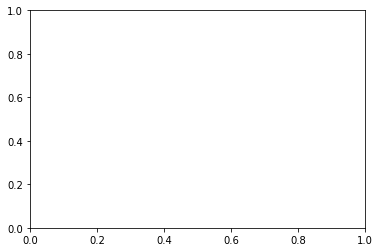

In [33]:
# plot of count versus Mean temp (°C) ? et si y'a plusieurs abscisse, ça va bug non ?
# mais ça vaut le coup de tenter

plt.plot(Weather_Freq['Mean temp (°C)'],Weather_Freq['frequency'])

## Influence of precipitation

In [ ]:
# clean the precipitation column
Weather_Freq['Total precip (mm)'] = Weather_Freq.apply(lambda row: virgule_to_point(row['Total precip (mm)']))

Weather_Freq['Total precip (mm)'] = Weather_Freq['Total precip (mm)'].astype(float)
# voir pour les chiffres qui manquent

plt.plot(Weather_Freq['Total precip (mm)'],Weather_Freq['frequency'])

## Influence of snow

In [ ]:
# clean the snow column
Weather_Freq['Snow on ground (cm)'] = Weather_Freq.apply(lambda row: virgule_to_point(row['Snow on ground (cm)']))

Weather_Freq['Snow on ground (cm)'] = Weather_Freq['Snow on ground (cm)'].astype(float)
# voir pour les chiffres qui manquent

plt.plot(Weather_Freq['Snow on ground (cm)'],Weather_Freq['frequency'])

## Influence of wind

It might be difficult to study the influence of wind because beyond a certain value (33 km/h) there is no numerical value.

## Parameters altogether

Using machine learning and Ridge regression, we will try to see the weight of the different parameters

In [ ]:
# libraries utiles
# je sais pas si je me sers de tout

import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split #ça je m'en sers
from sklearn.linear_model import Ridge #je m'en sers
from sklearn.model_selection import cross_val_predict #je m'en sers
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import mean_squared_error #je m'en sers
from sklearn.preprocessing import scale

In [ ]:
# à voir si j'utilise wind max speed parce que je suis pas sûre de pouvoir m'en servir bien
parameters = ['frequency', 'Mean temp (°C)','Total precip (mm)', 'Snow on ground (cm)', 'Wind max speed (km/h)']
y = Weather_Freq[parameters[0]]
X = Weather_Freq[parameters[1:]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [ ]:
# find the alpha for which mse (mean square error) is minimal

train_mse = [] # will contain mse value for each alpha in (0:2000)

# alpha = 0

ridge = Ridge(alpha=0)  #creation of the model
predicted_r = cross_val_predict(ridge, X_train, y_train, cv=5)
alpha_min = 0  #initialize alpha_min
min_mse = mean_squared_error(y_train, predicted_r)  #initialize min_mse
train_mse.append(min_mse)

# alpha in (1:2000)

for alpha_i in range(1, 2000):
    ridge = Ridge(alpha=alpha_i)
    predicted_r = cross_val_predict(ridge, X_train, y_train, cv=5)
    mse_i = mean_squared_error(y_train, predicted_r)
    train_mse.append(mse_i)    
    if mse_i < min_mse:
        alpha_min = alpha_i
        min_mse = mse_i

In [ ]:
# Which alpha is optimal ?

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(train_mse)
ax.scatter([alpha_min], [min_mse], edgecolors=(0, 0, 0), color = 'r')
ax.set_xlabel('alpha')
ax.set_ylabel('Mean Square Error')
plt.show()
print("Optimized alpha : ", alpha_min)
print("Minimal mean square error :", mean_squared_error(y_train, predicted_r))

In [ ]:
# finally we do the regression with the chosen alpha and take a look at the coefficient
        
ridge = Ridge(alpha=alpha_min)
predicted_r = cross_val_predict(ridge, X_train, y_train, cv=5)

ridge.fit(X_train, y_train)

ridge.coef_

# ça a pas l'air si mal de faire ça